In [9]:
import numpy as np

# https://rdr.ucl.ac.uk/articles/dataset/Recording_with_a_Neuropixels_probe/25232962/1

# from params.py
# dat_path = 'dataSubset.dat'
# n_channels_dat = 72
# dtype = 'int16'
# offset = 0
# sample_rate = 30000
# hp_filtered = False

# https://github.com/kwikteam/phy-contrib/blob/master/docs/template-gui.md



chanMap = np.load('template/channel_map.npy').ravel() # get rid of 2nd dim from matlab
chanMap.shape

(32,)

In [3]:
chanMap

array([ 7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31,  6,  8, 10, 12,
       14, 16, 18, 20, 22, 24, 26, 28, 30,  0,  1,  2,  3,  4,  5],
      dtype=int32)

In [4]:
chanPos = np.load('template/channel_positions.npy')
chanPos

array([[ 20., 140.],
       [  0., 160.],
       [  0., 180.],
       [ 20., 180.],
       [  0., 200.],
       [ 20., 200.],
       [  0., 220.],
       [ 20., 220.],
       [  0., 240.],
       [ 20., 240.],
       [  0., 260.],
       [ 20., 260.],
       [  0., 280.],
       [ 20., 280.],
       [  0., 300.],
       [ 20., 300.],
       [ 20., 320.],
       [  0., 340.],
       [ 20., 340.],
       [  0., 360.],
       [ 20., 360.],
       [  0., 380.],
       [ 20., 380.],
       [  0., 400.],
       [ 20., 400.],
       [  0., 420.],
       [ 20., 420.],
       [  0., 440.],
       [ 20., 440.],
       [  0., 460.],
       [ 20., 460.],
       [  0., 480.]])

In [11]:
nchannels = 32
inputfilename = 'template/sim_binary.dat'
with open(inputfilename, 'rb') as fid:
    data_array = np.fromfile(fid, np.int16).reshape((-1, nchannels)).T
data_array.shape

(32, 318750)

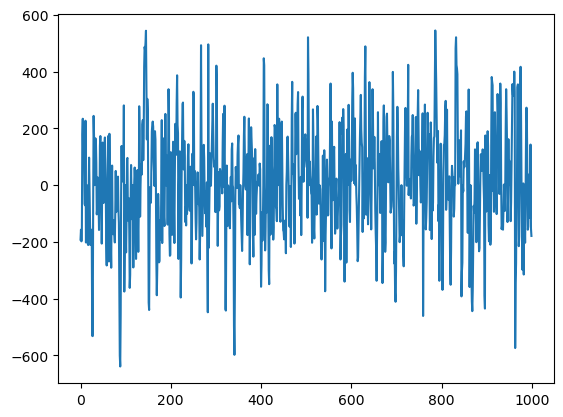

In [24]:
import matplotlib.pyplot as plt
chani = 1
plt.plot(data_array[list(chanMap).index(chani),:1000])

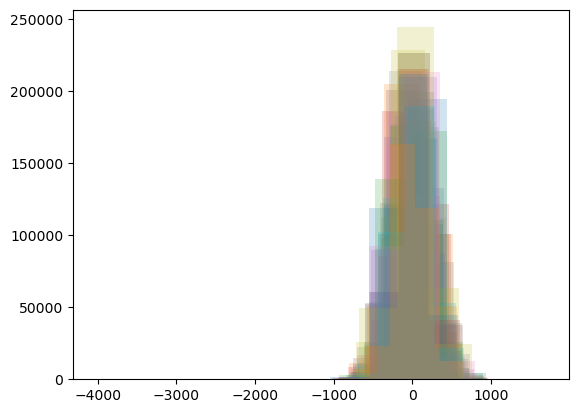

In [17]:
for ci in range(nchannels):
    plt.hist(data_array[ci],alpha=.2)

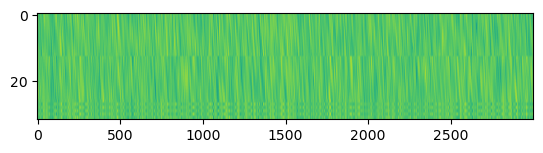

In [18]:
import matplotlib.pyplot as plt
plt.imshow(data_array[chanMap,:3000], aspect=20)

In [19]:
spk_templates = np.load('template/spike_templates.npy').ravel() # get rid of 2nd dim from matlab
spk_templates.shape

(314,)

In [20]:
spk_ts = np.load('template/spike_times.npy').ravel() # get rid of 2nd dim from matlab
spk_ts.shape

(314,)

In [21]:
spk_ts

array([  1006,   1270,   1687,   2160,   2864,   3020,   4909,   7474,
         8312,   8562,   9777,  10809,  11104,  12408,  12708,  13556,
        13611,  14120,  15345,  16200,  16294,  16571,  20298,  20398,
        21231,  21686,  21981,  22804,  24516,  25829,  26273,  26552,
        27201,  28096,  28290,  29365,  30624,  31702,  31967,  33128,
        33564,  36008,  37480,  38561,  41415,  41871,  42867,  45694,
        45882,  46353,  47720,  48420,  49230,  49323,  49402,  51370,
        53030,  53971,  54367,  54852,  56065,  56283,  58576,  59335,
        59346,  59992,  61675,  62509,  63009,  63315,  63427,  64329,
        65003,  65202,  66800,  69373,  70632,  70732,  70802,  71601,
        72324,  73157,  74207,  75281,  75969,  76086,  76164,  76582,
        77179,  77450,  78459,  78826,  80006,  80598,  81313,  82381,
        84105,  86129,  87387,  87555,  88609,  90201,  90532,  90853,
        92610,  93842,  94072,  94343,  94931,  97919,  99408, 100248,
      

unfiltered extracellular data


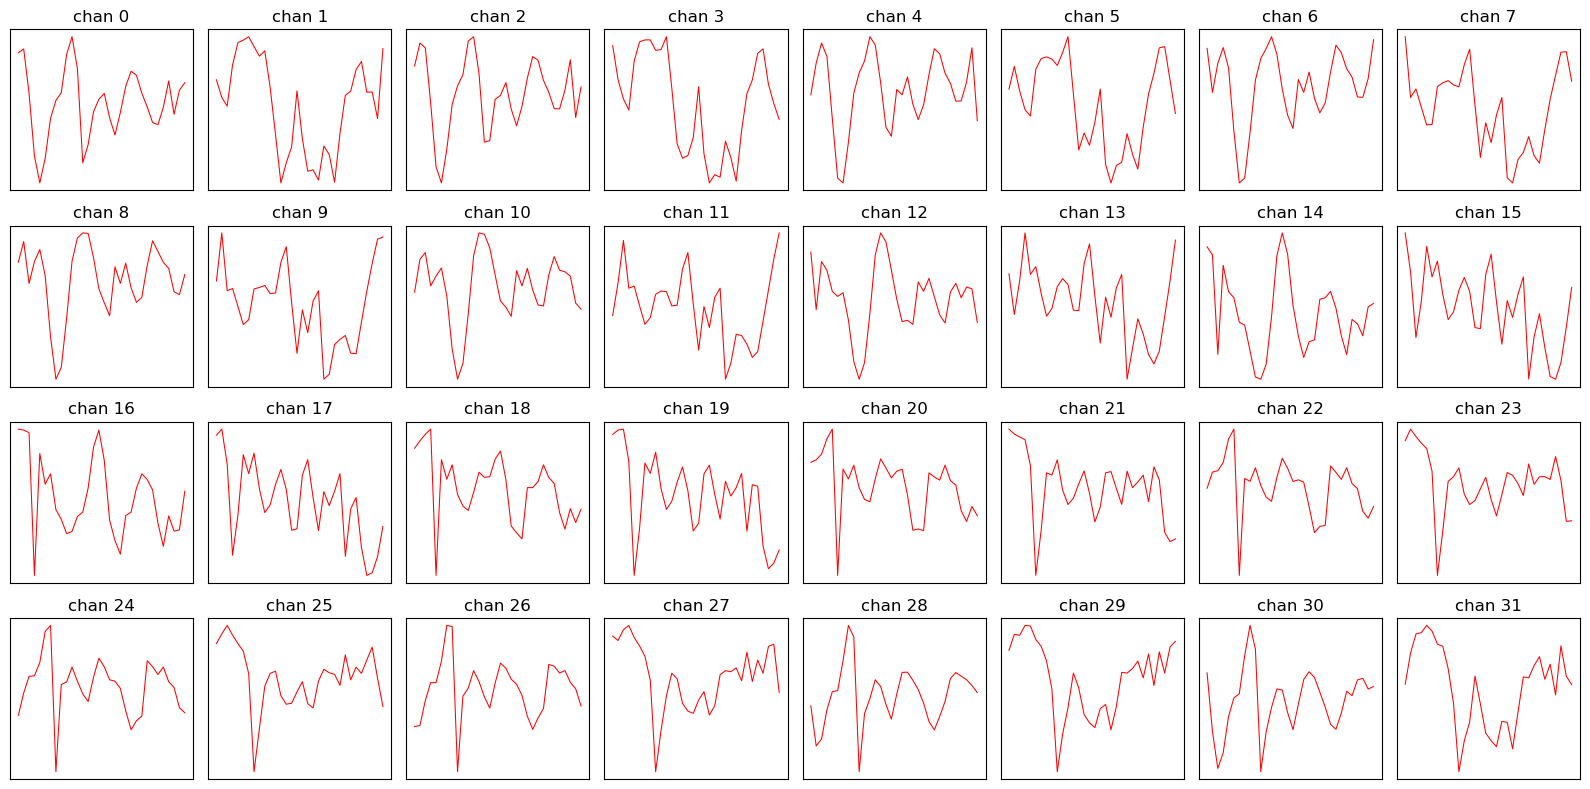

In [26]:
### Plot ALL channels each in a separate subplot within a time window around a juxta spike
## UNFILTERED DATA

spike_i = 10

Sampling_frequency = 25000
ncols = 8
nrows = int(np.ceil(nchannels/ncols))
f, axes = plt.subplots(nrows, ncols, figsize=(ncols*2, nrows*2))

num_of_points_in_spike_trig_ivm = 32
window_half_size = num_of_points_in_spike_trig_ivm//2 #1 ms = 30
ix = spk_ts[spike_i]
window_ixs = np.arange(ix - window_half_size, ix + window_half_size +  int(window_half_size % 2 == 1)).astype('int')

# # get common y scale for all channels?
# ymin, ymax = extra_Volts[:,window_ixs].min(), extra_Volts[:,window_ixs].max()

for chan_i in range(nchannels):
    ax = axes.ravel()[chan_i]

    ax.plot(window_ixs / Sampling_frequency, data_array[chan_i,window_ixs], c='r', lw=0.75, label='extra')
    
    ax.set(xticks=[], yticks=[], title=f'chan {chan_i}')
#     ax.set(ylim=(ymin, ymax))
f.tight_layout()
print('unfiltered extracellular data')
plt.show()